https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
import pandas as pd

df_orig = pd.read_csv('marketing_campaign.csv', sep='\t')

display(df_orig)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
print(df_orig.shape)
df = df_orig.dropna()
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(2240, 29)
(2216, 29)
(2216, 29)


In [5]:
# Convert columns to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')

display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
# Check categorical columns

for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].value_counts())
        print()

Education
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Marital_Status
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64



In [7]:
import numpy as np

#Feature Engineering
#Age of customer today 
df["Age"] = 2021-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)


/var/folders/9g/scfntfn168sc_tx3vb97mqf40000gn/T/ipykernel_23841/2658625979.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


In [8]:
display(df)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,40,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,54,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,0,75,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,40,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,65,843,Partner,1,3,1


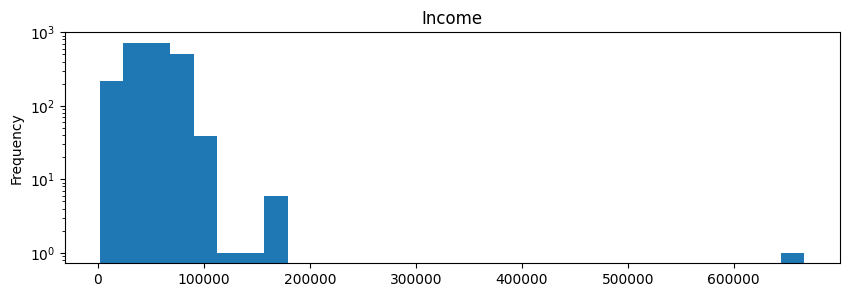

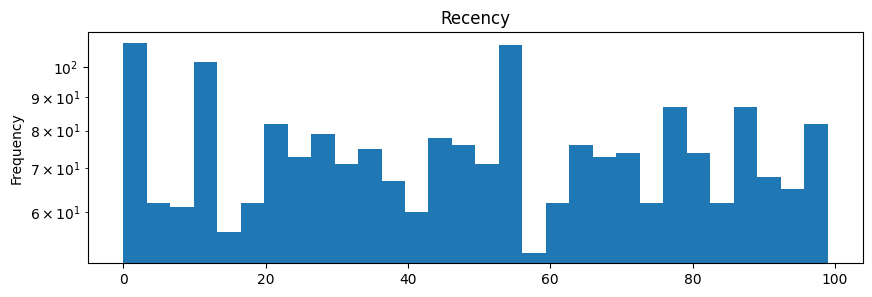

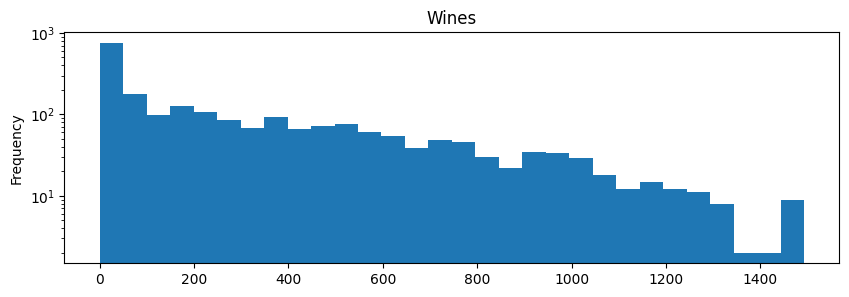

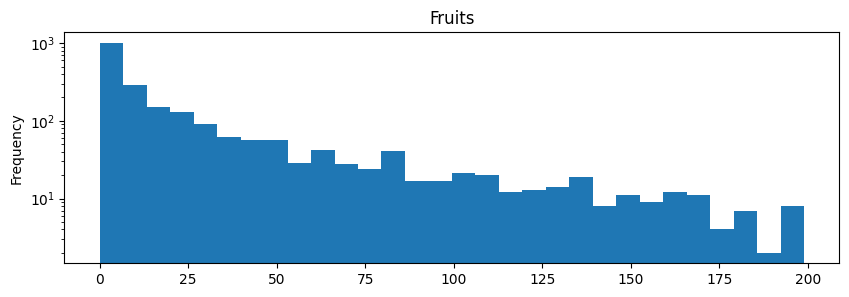

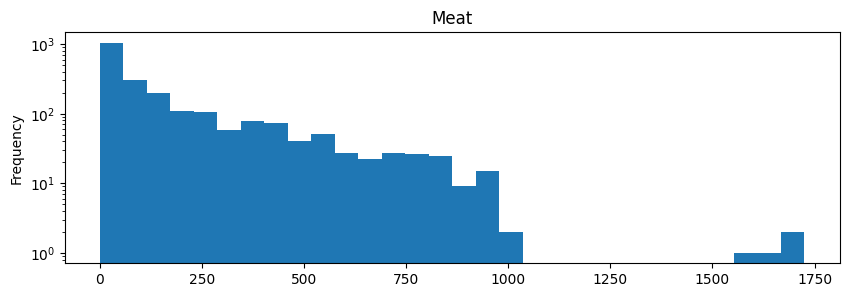

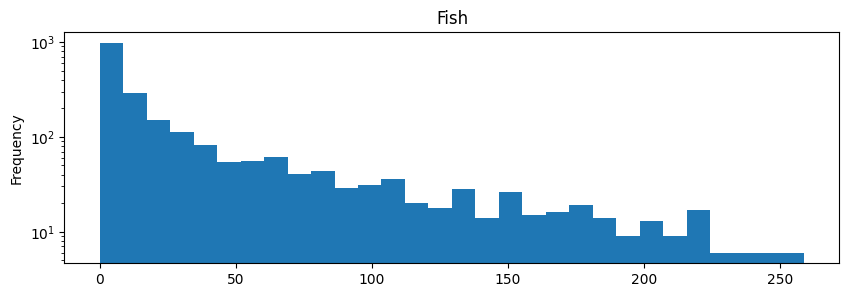

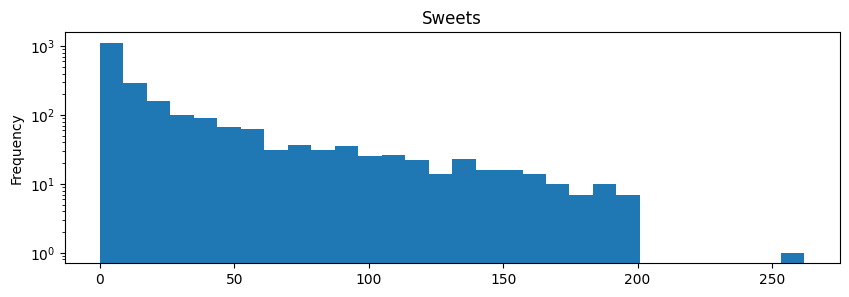

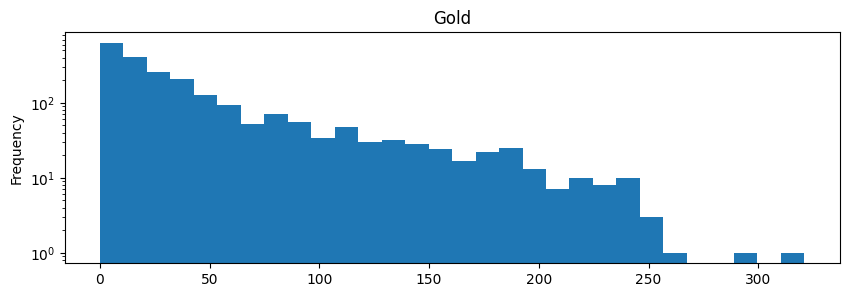

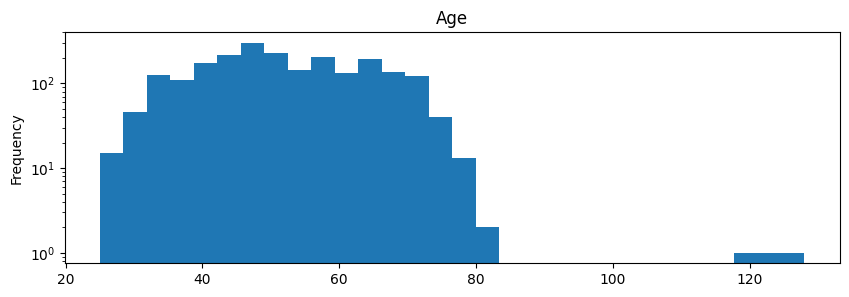

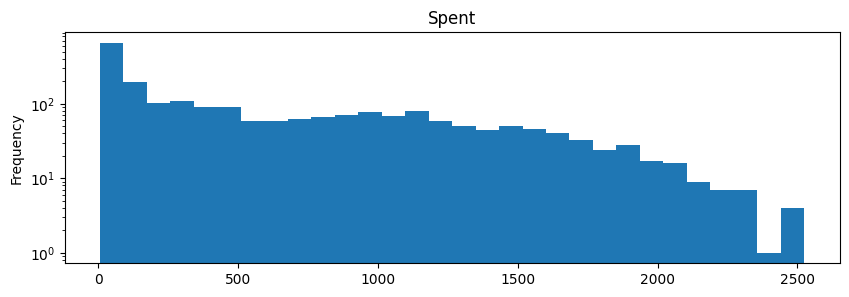

In [9]:
# 숫자 값 컬럼 값을 bar plot으로 시각화해서 이상치 확인
import matplotlib.pyplot as plt

for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 20:
        plt.figure(figsize=(10, 3))
        df[col].plot(kind='hist', bins=30)
        plt.title(col)
        plt.yscale('log')
        plt.show()



In [10]:
# IQR 기반 이상치 제거

for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 20:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(col, df.shape)

Income (2215, 29)
Recency (2215, 29)
Wines (2215, 29)
Fruits (2110, 29)
Meat (2056, 29)
Fish (1967, 29)
Sweets (1859, 29)
Gold (1790, 29)
Age (1788, 29)
Spent (1788, 29)


In [11]:
# categorical 컬럼을 one-hot encoding 하고, 원래 컬럼은 삭제

for col in df.columns:
    if df[col].dtype == 'object':
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
        df = df.drop(col, axis=1)
        
display(df)

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent,Education_Postgraduate,Education_Undergraduate,Living_With_Partner
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,67,27,2,3,1,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,56,776,0,2,0,False,False,True
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,37,53,1,3,1,False,False,True
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,40,422,1,3,1,True,False,True
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,0,54,716,1,3,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,34421.0,1,0,81,3,3,7,6,2,9,...,0,0,47,30,1,3,1,False,False,True
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,75,444,3,5,1,True,False,True
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,40,1241,0,1,0,False,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,65,843,1,3,1,True,False,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1788 entries, 1 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   1788 non-null   float64
 1   Kidhome                  1788 non-null   int64  
 2   Teenhome                 1788 non-null   int64  
 3   Recency                  1788 non-null   int64  
 4   Wines                    1788 non-null   int64  
 5   Fruits                   1788 non-null   int64  
 6   Meat                     1788 non-null   int64  
 7   Fish                     1788 non-null   int64  
 8   Sweets                   1788 non-null   int64  
 9   Gold                     1788 non-null   int64  
 10  NumDealsPurchases        1788 non-null   int64  
 11  NumWebPurchases          1788 non-null   int64  
 12  NumCatalogPurchases      1788 non-null   int64  
 13  NumStorePurchases        1788 non-null   int64  
 14  NumWebVisitsMonth        1788

In [13]:
# Train/Test 데이터 분리

from sklearn.model_selection import train_test_split

X = df.drop('Living_With_Partner', axis=1)
Y = df['Living_With_Partner']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1430, 29) (358, 29) (1430,) (358,)


In [14]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=15)
x_train_pca = pca.fit_transform(X_train_scaled)
display(pd.DataFrame(x_train_pca))

# 설명력 확인

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.985892,-1.963246,-0.470524,1.275572,1.305788,0.542794,0.882635,-0.195470,-0.992182,-0.689072,-1.252557,0.103042,0.737159,0.191406,-0.304068
1,6.401294,-1.625508,-1.778193,-0.967377,0.391738,-1.573637,-1.723376,0.462369,0.117273,-0.368983,-0.418840,-0.495747,1.022426,-0.443925,1.134917
2,-2.007680,-0.924406,1.550995,1.401107,-1.964134,-0.948515,-0.355537,1.101148,-1.095794,0.486693,-0.115758,-0.743013,0.781097,-0.915814,-0.270486
3,-3.046181,2.535727,-0.158540,-2.714742,0.658938,-1.316130,0.151794,-0.821522,0.851435,0.522341,-0.428780,-0.485230,0.426431,-0.431029,-0.266183
4,2.132938,1.704427,-1.346527,-0.025663,0.136547,1.402482,0.021552,-0.710033,0.847254,0.168148,0.598148,-0.162389,-0.434546,0.112656,-0.989713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,5.075890,1.076296,5.914165,1.590093,3.171737,-1.305029,-0.556838,1.190545,-0.722881,1.652102,-1.615801,0.095315,-2.987398,0.466241,-0.553465
1426,-3.057342,0.611072,1.059076,1.126709,-0.000377,-1.534537,0.737444,0.147074,-0.648218,0.661103,0.136155,-1.315319,-0.444982,-0.964838,-0.566678
1427,-2.879834,0.135469,-0.111782,-0.585267,0.529908,-0.900631,1.123301,-0.079729,-1.143107,-0.073394,0.586137,-0.206303,-0.737383,0.345063,-0.032931
1428,-2.746838,-1.244972,0.254175,-0.000454,0.280663,-0.056791,-0.366691,0.193101,0.071487,0.514305,0.506859,-0.095366,-0.388618,0.348787,0.595237


[0.28789649 0.11290971 0.06764108 0.0571897  0.04587699 0.04289162
 0.03755677 0.03468134 0.03341984 0.02742594 0.0268706  0.02530295
 0.0229278  0.02101368 0.02034444]
0.8639489598294584


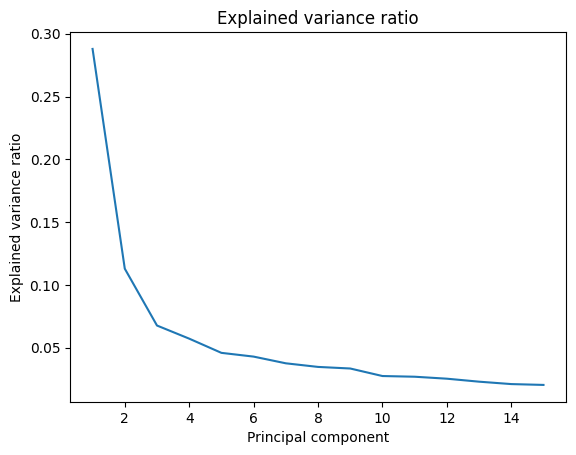

In [16]:
# elbow point 확인

plt.plot(range(1, 16), pca.explained_variance_ratio_)
plt.title('Explained variance ratio')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()

# 클러스터링

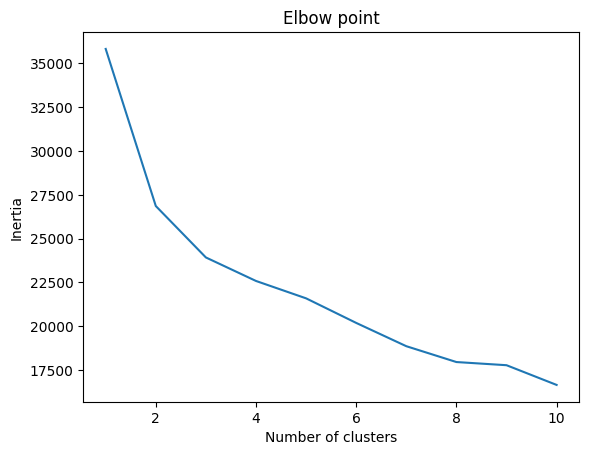

In [17]:
# 적정 클러스터 수 찾기

from sklearn.cluster import KMeans


inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_train_pca)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('Elbow point')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [18]:
# clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_train_pca)

X_train_clustered = kmeans.predict(x_train_pca)

print(X_train_clustered)

[0 1 0 ... 0 0 2]


In [19]:
# clustering 결과 카운트

pd.Series(X_train_clustered).value_counts()


0    801
2    430
1    199
Name: count, dtype: int64

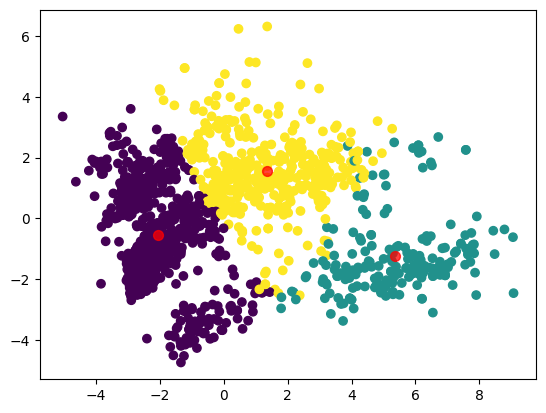

In [20]:
# clustering 결과 시각화

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=X_train_clustered, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)
plt.show()


[0 2 1 2 2 2 0 0 1 0 2 0 2 2 2 0 0 0 0 2 0 2 0 0 1 0 0 0 2 2 2 0 1 0 0 0 0
 2 0 0 0 0 2 2 2 0 0 2 0 0 2 0 0 0 0 2 2 1 0 1 2 2 0 0 2 2 0 1 0 1 0 1 2 0
 0 0 1 0 2 0 1 0 0 0 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 0 0 0 0 2 0 1 0 0 0 0 2
 0 1 0 0 1 1 0 0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 2 2 0 1 0 2 2 0 2 0 2 1 0 2
 0 0 0 2 0 1 1 0 0 2 1 0 0 0 0 1 2 2 0 0 0 1 0 0 0 0 0 0 0 0 2 0 2 2 0 0 2
 2 0 1 0 2 2 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 2 0 1 0 0 2 0 0 0 2 2 0 0
 0 0 0 2 0 0 1 0 2 2 0 1 0 0 0 2 2 2 0 0 0 0 2 0 0 0 0 2 1 2 2 0 1 1 2 0 2
 0 1 0 0 2 1 0 1 0 2 0 0 2 0 0 0 0 0 2 0 2 0 0 0 2 1 0 2 0 0 2 2 2 2 0 0 0
 0 0 0 0 0 2 2 1 0 0 0 2 0 0 2 2 2 0 2 2 0 0 0 0 2 0 1 1 0 0 0 2 2 2 0 0 0
 2 0 0 0 2 0 1 0 0 2 2 0 0 0 0 1 2 0 0 0 0 2 0 1 0]


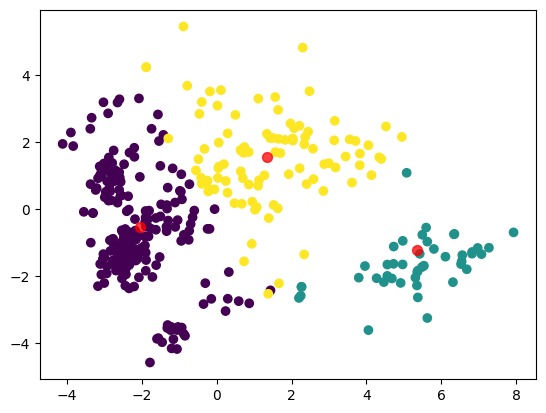

In [21]:
# 3개 클러스터에 대한 테스트 데이터의 클러스터 예측

x_test_pca = pca.transform(X_test_scaled)
X_test_clustered = kmeans.predict(x_test_pca)

print(X_test_clustered)

# 클러스러티링 결과 시각화

plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=X_test_clustered, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75)
plt.show()

In [22]:
# 각 클러스터 별로 통계량 확인

df_train = pd.DataFrame(X_train, columns=X.columns)

df_train['Cluster'] = X_train_clustered

for cluster in df_train['Cluster'].unique():
    print('Cluster', cluster)
    display(df_train[df_train['Cluster'] == cluster].describe())

    

Cluster 0


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent,Cluster
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0
mean,35118.712859,0.806492,0.454432,48.981273,42.409488,4.655431,22.588015,6.526841,4.716604,14.550562,...,0.001248,0.002497,0.007491,0.097378,49.705368,95.446941,1.260924,2.897628,0.881398,0.0
std,14677.691365,0.488628,0.517913,29.189825,52.842687,7.305041,23.692141,8.797988,6.674454,15.252221,...,0.035333,0.049938,0.086278,0.296657,10.948543,83.401918,0.703977,0.858491,0.323521,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000,0.0
25%,26091.000000,1.000000,0.000000,24.000000,8.000000,0.000000,7.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,42.000000,38.000000,1.000000,2.000000,1.000000,0.0
50%,34596.000000,1.000000,0.000000,49.000000,20.000000,2.000000,15.000000,3.000000,2.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,49.000000,64.000000,1.000000,3.000000,1.000000,0.0
75%,42731.000000,1.000000,1.000000,76.000000,56.000000,6.000000,28.000000,10.000000,6.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,57.000000,131.000000,2.000000,3.000000,1.000000,0.0
max,162397.000000,2.000000,2.000000,99.000000,308.000000,55.000000,141.000000,84.000000,62.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,81.000000,460.000000,3.000000,5.000000,1.000000,0.0


Cluster 1


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent,Cluster
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,73187.070352,0.030151,0.115578,49.045226,678.929648,43.140704,373.386935,68.040201,40.211055,55.356784,...,0.150754,0.055276,0.005025,0.286432,54.221106,1259.065327,0.145729,1.773869,0.140704,1.0
std,10691.353431,0.171433,0.320524,29.564225,354.555042,31.644335,185.155998,41.246958,24.733850,40.727331,...,0.358711,0.229095,0.070888,0.453234,14.107501,418.504505,0.367725,0.630953,0.348592,0.0
min,36262.000000,0.000000,0.000000,0.000000,71.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,310.000000,0.000000,1.000000,0.000000,1.0
25%,68109.000000,0.000000,0.000000,23.000000,396.500000,19.000000,230.000000,34.000000,20.500000,26.000000,...,0.000000,0.000000,0.000000,0.000000,42.000000,968.000000,0.000000,1.000000,0.000000,1.0
50%,73892.000000,0.000000,0.000000,52.000000,656.000000,35.000000,376.000000,62.000000,38.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,56.000000,1253.000000,0.000000,2.000000,0.000000,1.0
75%,81023.000000,0.000000,0.000000,73.000000,926.500000,63.500000,512.000000,102.000000,58.500000,82.500000,...,0.000000,0.000000,0.000000,1.000000,66.000000,1536.000000,0.000000,2.000000,0.000000,1.0
max,95169.000000,1.000000,1.000000,98.000000,1493.000000,124.000000,758.000000,150.000000,93.000000,154.000000,...,1.000000,1.000000,1.000000,1.000000,80.000000,2252.000000,2.000000,3.000000,1.000000,1.0


Cluster 2


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent,Cluster
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0
mean,58189.511628,0.241860,0.946512,46.532558,440.458140,20.960465,131.188372,27.290698,19.295349,49.751163,...,0.037209,0.011628,0.009302,0.106977,56.283721,688.944186,1.188372,2.867442,0.962791,2.0
std,10217.232351,0.449933,0.403278,28.211119,265.428645,23.902401,88.694018,30.407131,20.955580,38.853391,...,0.189495,0.107329,0.096111,0.309444,9.908602,314.445961,0.519418,0.702052,0.189495,0.0
min,24401.000000,0.000000,0.000000,0.000000,65.000000,0.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29.000000,227.000000,0.000000,1.000000,0.000000,2.0
25%,51208.750000,0.000000,1.000000,23.000000,233.500000,4.000000,68.250000,6.000000,3.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,48.000000,436.000000,1.000000,2.000000,1.000000,2.0
50%,58300.500000,0.000000,1.000000,48.000000,378.500000,12.500000,108.000000,16.000000,12.000000,38.500000,...,0.000000,0.000000,0.000000,0.000000,56.000000,612.000000,1.000000,3.000000,1.000000,2.0
75%,65330.750000,0.000000,1.000000,69.000000,591.750000,30.750000,171.000000,39.000000,28.000000,70.750000,...,0.000000,0.000000,0.000000,0.000000,65.000000,907.000000,1.000000,3.000000,1.000000,2.0
max,93404.000000,2.000000,2.000000,99.000000,1279.000000,123.000000,494.000000,150.000000,92.000000,155.000000,...,1.000000,1.000000,1.000000,1.000000,77.000000,1829.000000,3.000000,5.000000,1.000000,2.0


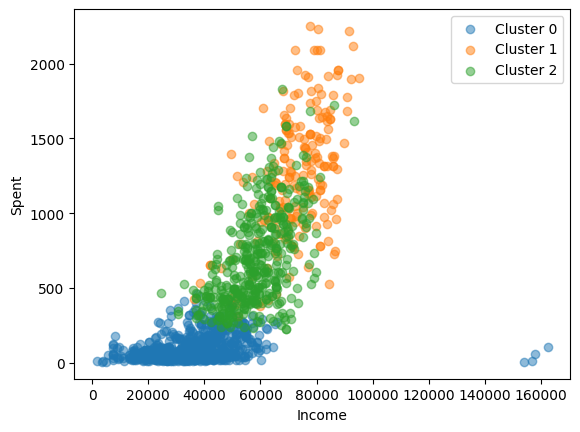

In [47]:
# 클러스터별로 수입-지출 관계 확인

for cluster in df_train['Cluster'].unique():
    
    df_cluster = df_train[df_train['Cluster'] == cluster]
    
    plt.scatter(df_cluster['Income'], df_cluster['Spent'], label=f'Cluster {cluster}', alpha=0.5)
    
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()

plt.show()

/var/folders/9g/scfntfn168sc_tx3vb97mqf40000gn/T/ipykernel_23841/2845864735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df_train, palette='viridis')


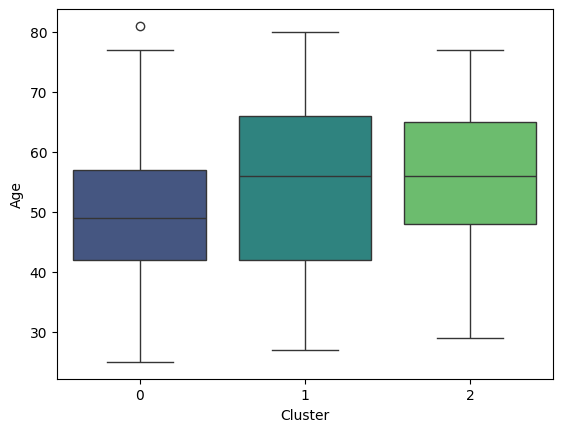

In [45]:
# 클러스터별로 나이 평균 분포 boxplot으로 확인

import seaborn as sns

sns.boxplot(x='Cluster', y='Age', data=df_train, palette='viridis')
plt.show()
    

/var/folders/9g/scfntfn168sc_tx3vb97mqf40000gn/T/ipykernel_23841/4228967571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Wines', data=df_train, palette='viridis')


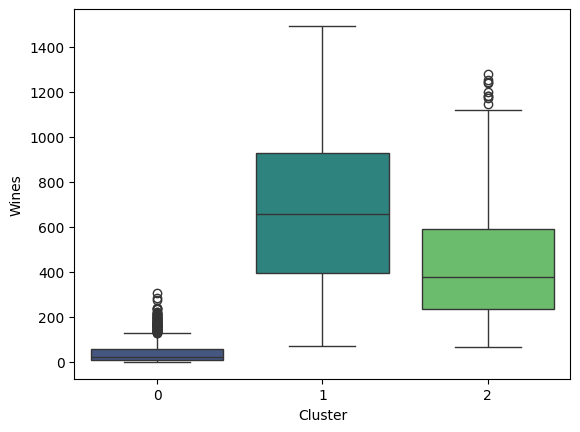

In [48]:
# 클러스터별 와인 소비량 확인 boxplot으로 확인

sns.boxplot(x='Cluster', y='Wines', data=df_train, palette='viridis')
plt.show()

/var/folders/9g/scfntfn168sc_tx3vb97mqf40000gn/T/ipykernel_23841/3315428414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Family_Size', data=df_train, palette='viridis')


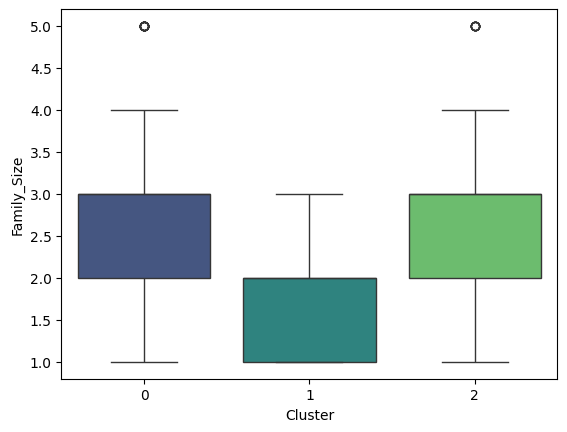

In [49]:
# boxplot으로 클러스터별 가족 구성원 수 확인


sns.boxplot(x='Cluster', y='Family_Size', data=df_train, palette='viridis')
plt.show()


<Axes: xlabel='Cluster', ylabel='count'>

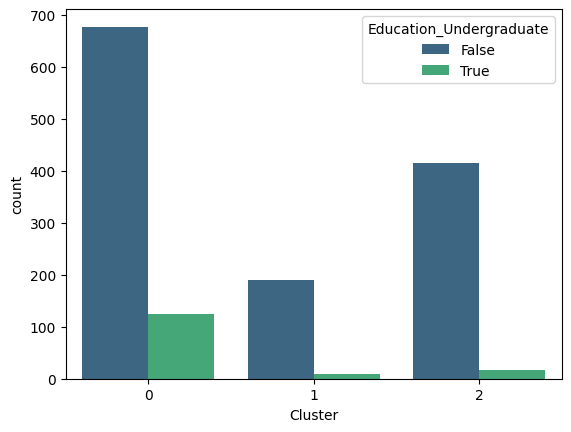

In [50]:
# 클러스터별 교육 수준 확인 (Education_Undergraduate)

sns.countplot(x='Cluster', hue='Education_Undergraduate', data=df_train, palette='viridis')
